# Day 01

**What is Image Recognition?**

Image recognition is a technology that allows computers to identify and understand objects, people, places, or patterns in images.
For example:

* Facebook tagging a friend in a photo

* Google Photos grouping similar images

* A self-driving car recognizing traffic signs

It is often done using machine learning or deep learning techniques.


**What is Deep Learning?**

Deep learning is a type of machine learning where a computer learns patterns using many layers of artificial neurons (similar to the human brain’s structure).

* It works well with large amounts of data.

* Used in speech recognition, image classification, translation, and more.
Example: A deep learning model can learn to tell if an image contains a cat or a dog, without being explicitly told the rules for “cat” or “dog.”

**What is a Dataset?**

A dataset is a collection of data used for training and testing machine learning models.

* In image recognition, a dataset might be a folder containing thousands of labeled images (e.g., “cat,” “dog,” “car”).

* In text analysis, a dataset could be thousands of sentences or documents.

**Why Preprocessing?**

Preprocessing is cleaning and preparing raw data before feeding it into a machine learning model.
Reasons:

* Remove noise or errors in the data

* Standardize formats (e.g., resize images, normalize values)

* Improve model accuracy and speed

Example: Before training an image recognition model, you might resize all images to 224×224 pixels and adjust brightness.

**What is EDA (Exploratory Data Analysis?)**

Exploratory Data Analysis is the process of examining and visualizing data to understand its structure, patterns, and relationships before building a model.
You might:

* Check for missing values

* Look at distributions of data

Create plots and graphs
Purpose: To detect problems, gain insights, and decide next steps in data preparation.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sriramtspe","key":"c86345a1a1042d52d56385dbd6f77944"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


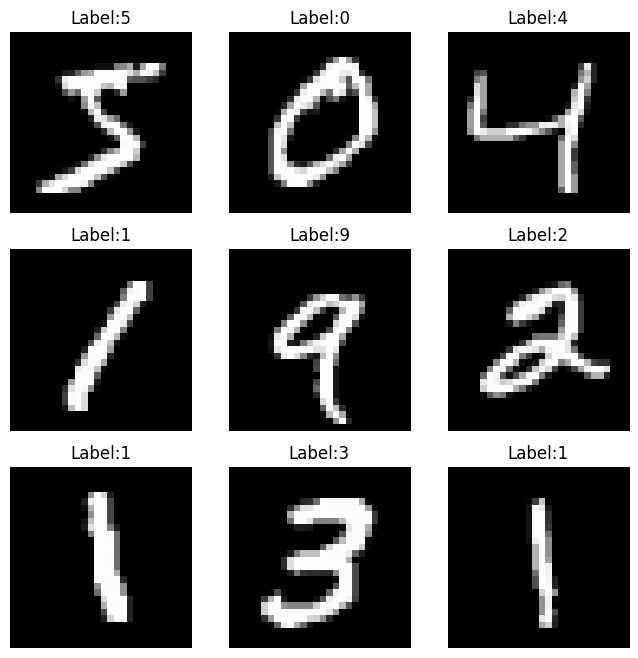

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
  plt.title(f"Label:{y_train[i]}")
  plt.axis("off")
plt.show()

In [ ]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 Train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 Train shape: (50000, 32, 32, 3)


# Day 02

**What is a Convolutional Neural Network (CNN)?**

A Convolutional Neural Network is a type of deep learning model designed to work especially well with images.

* It automatically learns important features from images (like edges, shapes, and textures).

* Uses convolution layers to scan the image in small parts instead of looking at the whole image at once.

* This makes it faster and more accurate for image recognition.

Example: In a cat vs dog classifier, the CNN will first detect edges (like whiskers), then shapes (ears), and finally the whole object (cat face).

**How does model training work?**

Training is how the model learns from data. The process:

1. Input Data → Feed images and their labels (e.g., “cat”) into the model.

2. Forward Pass → The model makes a prediction (e.g., “dog” with 70% confidence).

3. Loss Calculation → Compare the prediction with the correct label and measure the error.

4. Backward Pass (Backpropagation) → Adjust the weights in the model to reduce the error.

5. Repeat for Many Epochs → Each pass over the training data improves accuracy.

**How do we use Dropout?**

Dropout is a regularization technique used during training to prevent overfitting (when the model memorizes the training data but fails on new data).

* At each training step, Dropout randomly turns off some neurons in the network.

* This forces the model to learn more general features.

Example: If Dropout rate is 0.5, half of the neurons are ignored in each training round.



**How to evaluate a model?**

After training, we check the model’s performance on new data (test set). Common steps:

* Accuracy → % of correct predictions.

* Confusion Matrix → Shows correct and incorrect predictions for each class.

* Precision & Recall → For more detailed evaluation.

* Loss curves → See if the model is improving or overfitting.

In [ ]:
from typing import Optional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.8959 - loss: 0.3373 - val_accuracy: 0.9818 - val_loss: 0.0626
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9844 - val_loss: 0.0528
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9902 - loss: 0.0297 - val_accuracy: 0.9878 - val_loss: 0.0414
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9926 - loss: 0.0221 - val_accuracy: 0.9879 - val_loss: 0.0442
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9901 - val_loss: 0.0366


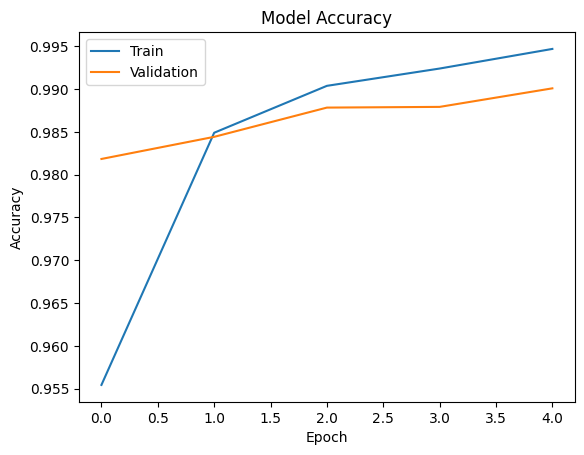

In [ ]:
plt.plot(history.history["accuracy"],label='Train')
plt.plot(history.history["val_accuracy"],label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


# Day 03

**Why deeper CNNs?**

A deeper CNN means the network has more layers (convolution layers, pooling layers, etc.).

* **Shallow CNN** → Can learn only simple features like edges or colors.

* **Deeper CNN** → Can learn complex features like shapes, textures, and even object parts.

Example:

* 1st layers → Detect lines and edges.

* Middle layers → Detect shapes (eyes, nose).

* Last layers → Detect complete objects (cat face).

The deeper the network, the better it can understand high-level details in images.
However, deeper CNNs need more data and more computing power to avoid overfitting.

**What is Data Augmentation?**

Data augmentation is creating new training images from existing ones by applying transformations.
Purpose: To make the model more robust and reduce overfitting.

Examples of transformations:

* Rotate the image

* Flip horizontally or vertically

* Change brightness or contrast

* Zoom in or crop

If you only have 1,000 images, augmentation can generate thousands of slightly different versions, making the model learn better.


**What is Advanced Evaluation Metrics?**

Beyond accuracy, some problems need more detailed evaluation. Examples:

* **Precision** → Of all predicted positives, how many are correct?

* **Recall** → Of all actual positives, how many were found?

* **F1 Score** → Harmonic mean of precision and recall (good balance).

* **AUC-ROC** → Measures how well the model separates classes across thresholds.

* **IoU (Intersection over Union)** → For object detection, how much predicted area overlaps with actual object.

These metrics are important when:

* Data is **imbalanced** (e.g., 95% cats, 5% dogs)

* Errors have different costs (e.g., medical diagnosis)

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_acc:.4f}")
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9885 - loss: 0.0402
Test Accuracy: 0.9907
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential

model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data = (X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - accuracy: 0.3586 - loss: 1.8686 - val_accuracy: 0.5092 - val_loss: 1.3643
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5129 - loss: 1.3753 - val_accuracy: 0.5830 - val_loss: 1.2143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.5672 - loss: 1.2236 - val_accuracy: 0.5558 - val_loss: 1.3231
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6027 - loss: 1.1377 - val_accuracy: 0.6230 - val_loss: 1.1329
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6286 - loss: 1.0636 - val_accuracy: 0.6973 - val_loss: 0.8807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.6441 - loss: 1.0147 - val_accuracy: 0.6527 - val_loss: 1.0490
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6634 - loss: 0.9684 - val_accuracy: 0.7193 - val_loss: 0.8129
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.6756 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      1000
           1       0.81      0.92      0.86      1000
           2       0.73      0.59      0.66      1000
           3       0.68      0.42      0.52      1000
           4       0.75      0.71      0.73      1000
           5       0.71      0.60      0.65      1000
           6       0.69      0.88      0.78      1000
           7       0.85      0.75      0.80      1000
           8       0.87      0.75      0.81      1000
           9       0.72      0.88      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



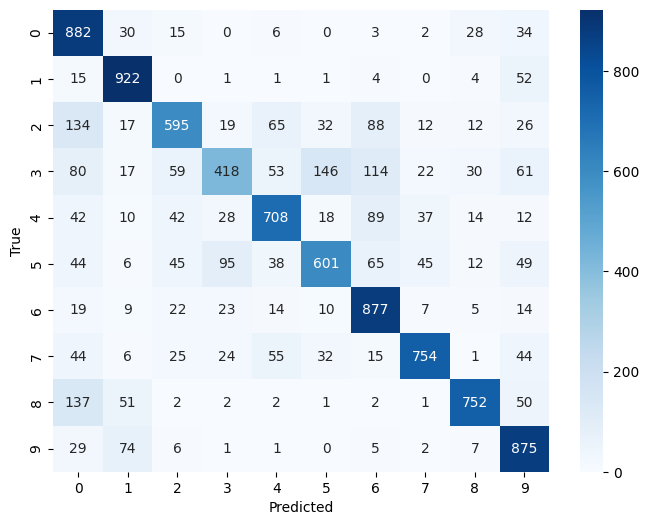

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Day 4

**What are pre-trained model?**

A pre-trained model is a model that has already been trained on a large dataset by someone else, so you don’t have to start from scratch.

* Example: A CNN trained on ImageNet (millions of images).

* You can reuse it for your own problem, often with just small adjustments.

Why use them?

Save time and computing power

Often give better accuracy with less data

Examples:
ResNet, VGG16, MobileNet, EfficientNet.
          **MobileNetV2,ResNet,VGG,ImageNet**


**What is Transfer learning?**

Transfer learning is the process of taking a pre-trained model and adapting it to your own task.

* Keep the learned features from the original training (edges, shapes, textures).

* Replace the last layers with new ones for your problem.

Example:

* Pre-trained model learned to recognize 1,000 classes (ImageNet).

* You change the output layer to predict only 3 classes: Cat, Dog, Rabbit.

**How to Fine Tune and Optimize?**

Fine-tuning means slightly re-training the pre-trained model’s layers on your dataset to improve performance.

Steps:

1. **Freeze early layers** (keep their weights unchanged).

2. **Train only new layers** you added for your task.

3. Gradually unfreeze some earlier layers and train them at a **low learning rate**.

Optimization tips:

* Use the right optimizer (Adam, SGD)

* Use learning rate scheduling (reduce learning rate over time)

* Use regularization (Dropout, weight decay)

Monitor validation loss to avoid overfitting




**How to Deploy a Model?**

Deployment means making your trained model available for real-world use.

Steps:

1. Save the model (e.g., .h5, .pt, or ONNX format).

2. Choose where to deploy:

  * Web app (Flask, FastAPI, Streamlit)

  * Mobile app (TensorFlow Lite, Core ML)

  * Cloud service (AWS, Azure, GCP)

3. Set up an API so other programs can send data and get predictions.

4. Monitor performance in real-time and retrain if accuracy drops.



In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 94% 205M/218M [00:00<00:00, 315MB/s] 
100% 218M/218M [00:00<00:00, 330MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/cat-and-dog.zip","r") as zip_ref:
  zip_ref.extractall("/content/dogs-vs-cats")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    "/content/dogs-vs-cats",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)
val_generator=datagen.flow_from_directory(
    "/content/dogs-vs-cats",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.7834 - loss: 0.6775 - val_accuracy: 0.7985 - val_loss: 0.6311
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.8007 - loss: 0.6184 - val_accuracy: 0.7985 - val_loss: 0.5866
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.8030 - loss: 0.5762 - val_accuracy: 0.7985 - val_loss: 0.5561
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.8024 - loss: 0.5478 - val_accuracy: 0.7985 - val_loss: 0.5354
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.7974 - loss: 0.5325 - val_accuracy: 0.7985 - val_loss: 0.5221


In [ ]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
              )
model.fit(train_generator, epochs=3, validation_data=val_generator)


Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1684s 7s/step - accuracy: 0.7993 - loss: 0.5214 - val_accuracy: 0.7985 - val_loss: 0.5220
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1693s 7s/step - accuracy: 0.8001 - loss: 0.5205 - val_accuracy: 0.7985 - val_loss: 0.5218
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1641s 7s/step - accuracy: 0.8034 - loss: 0.5173 - val_accuracy: 0.7985 - val_loss: 0.5216


In [ ]:
model.save('mobilenet_cats_dogs.h5')

#To load
import  tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step


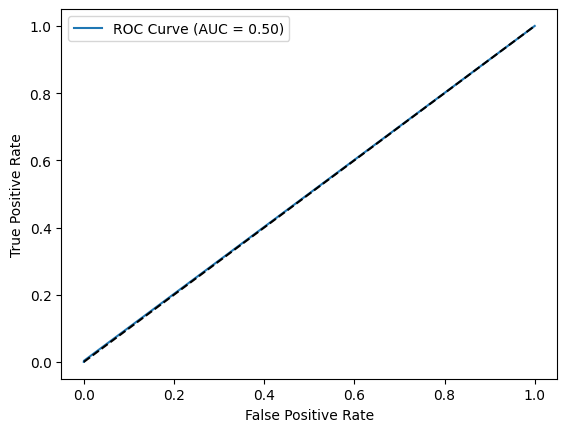

In [ ]:
# @title
from sklearn.metrics import roc_curve, auc

y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##Day 05
**How to Predict on New Data?**

Once your model is trained and saved, you can use it to make predictions on new, unseen data.

Steps:

1. Load the trained model from file.

2. Preprocess the new data the same way you did for training (resize, normalize, etc.).

3. Feed the data into the model using model.predict() (Keras) or model.forward() (PyTorch).

4. Interpret the output:

* If classification → pick the label with the highest probability.

* If regression → read the predicted numeric value.

Example (Image Classification):

* Input: New cat photo

* Output: [Cat: 0.92, Dog: 0.06, Rabbit: 0.02] → Model predicts Cat.



**How to Create Portfolio Assets?**

Portfolio assets show your skills to employers or clients. For image recognition projects, you can create:

* **GitHub Repo** → Code, datasets (or dataset links), and README file.

* **Jupyter Notebook** → With step-by-step explanations, code, and results.

* **Before/After Images** → Show input images and predictions.

* **Short Demo Video** → Show the model in action (web app, mobile app).

* **Blog Post** → Explain problem, approach, and results in plain language.

Tip: Use a clean structure in GitHub:

project/

 ├── data/

 ├── notebooks/

 ├── models/

 ├── app/

 ├── README.md


**How to Present Results?**
When sharing your results, keep them clear, visual, and easy to understand.

Include:

* **Problem Statement** → What you were trying to solve.

* **Dataset Info** → Size, source, any preprocessing.

* **Model Used** → CNN, transfer learning, etc.

* **Key Metrics** → Accuracy, precision, recall, F1 score, etc.

* **Visuals:**

  * Graphs of training vs validation accuracy/loss

  * Confusion matrix for classification problems

  * Example predictions with correct/incorrect cases

* **Conclusion** → Summary of performance and possible improvements.

In [45]:
from google.colab import files
# uploaded = files.upload()  # Upload e.g. 'mycat.jpg' - this line is commented out to use a file already in the dataset

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Update the image path to point to an actual image file in the dataset
img_path = '/content/cat.4001.jpg'  # Example: using a cat image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Prediction:", prediction)
print("Predicted class:", "Cat" if prediction[0][0] > 0.5 else "Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: [[0.7130065]]
Predicted class: Cat


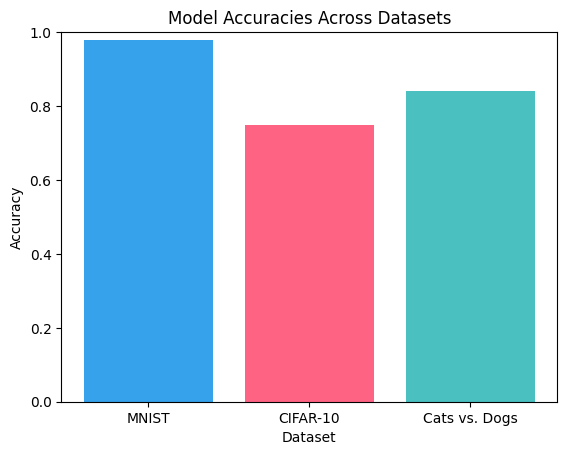

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()